In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'D:\aa\working_results\Book3.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,pm25,pm10,no2,so2,co,o3
Date,,,,,,
2017-10-17 10:00:00,110.75,234.67,82.22,101.55,1.06,27.12
2017-10-17 11:00:00,165.34,536.91,49.09,130.76,0.98,87.85
2017-10-17 12:00:00,130.91,555.58,43.34,129.64,0.53,79.69
2017-10-17 13:00:00,126.39,556.05,32.97,103.30,0.40,78.19
2017-10-17 14:00:00,131.90,504.41,42.27,94.55,0.17,72.72


In [4]:
df.tail(5)

,pm25,pm10,no2,so2,co,o3
Date,,,,,,
2022-12-16 08:00:00,51.14,207.80,63.70,11.43,1.00,7.86
2022-12-16 09:00:00,75.18,241.10,83.39,13.30,1.06,26.08
2022-12-16 10:00:00,62.42,219.90,64.22,14.29,0.88,43.84
2022-12-16 11:00:00,54.10,173.33,53.70,12.77,0.80,56.66
2022-12-16 12:00:00,33.23,133.40,51.72,30.68,0.89,37.06


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

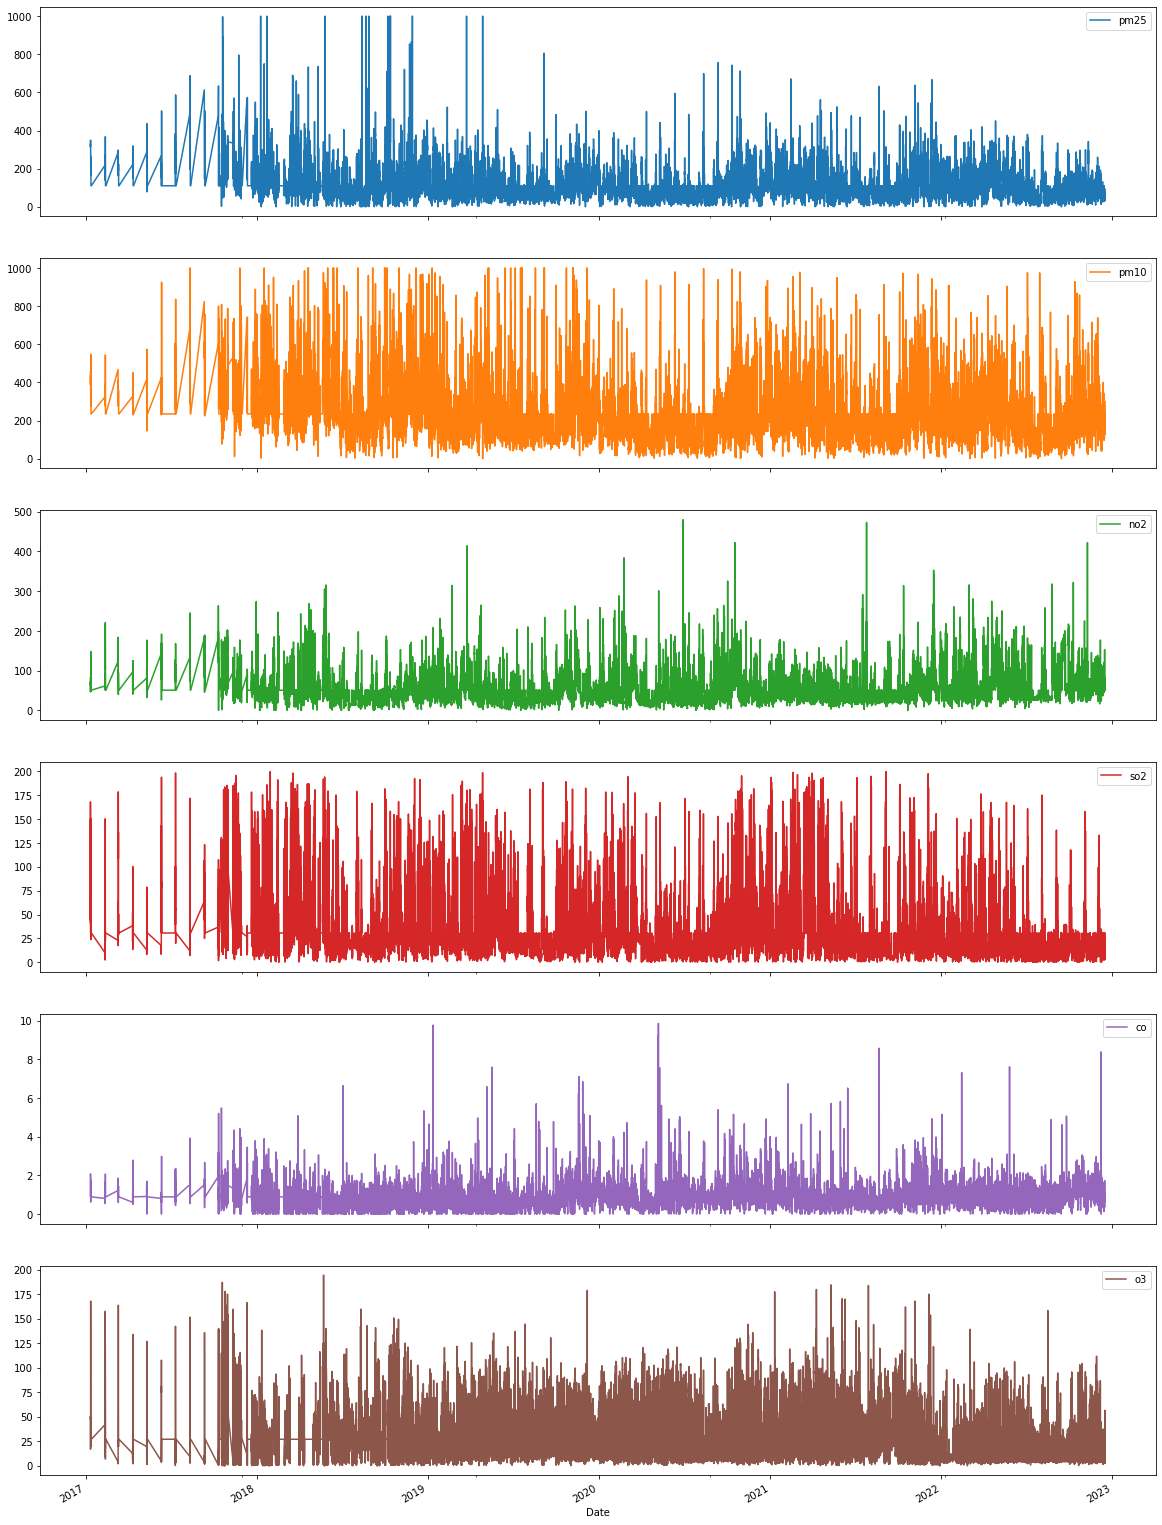

In [5]:
df.plot(figsize=(20,30), subplots=True)

In [6]:
def calcPM25(x):
    if x <= 10:
        return 1
    elif x >=11 and x <= 20:
        return 2
    elif x >=21 and x <= 25:
        return 3
    elif x >=26 and x <= 50:
        return 4
    elif x >=51 and x <= 75:
        return 5
    elif x >=76:
        return 6
    else:
        return 1
    
def calcPM10(x):
    if x <= 20:
        return 1
    elif x >=21 and x <= 40:
        return 2
    elif x >=41 and x <= 50:
        return 3
    elif x >=51 and x <= 100:
        return 4
    elif x >=101 and x <= 150:
        return 5
    elif x >=151:
        return 6
    else:
        return 1
    
def calcNO2(x):
    if x <= 40:
        return 1
    elif x >=41 and x <= 90:
        return 2
    elif x >=91 and x <= 120:
        return 3
    elif x >=121 and x <= 230:
        return 4
    elif x >=231 and x <= 340:
        return 5
    elif x >=341:
        return 6
    else:
        return 1
    
def calcO3(x):
    if x <= 50:
        return 1
    elif x >=51 and x <= 100:
        return 2
    elif x >=101 and x <= 130:
        return 3
    elif x >=131 and x <= 240:
        return 4
    elif x >=241 and x <= 380:
        return 5
    elif x >=381:
        return 6
    else:
        return 1
    
def calcSO2(x):
    if x <= 100:
        return 1
    elif x >=101 and x <= 200:
        return 2
    elif x >=201 and x <= 350:
        return 3
    elif x >=351 and x <= 500:
        return 4
    elif x >=501 and x <= 750:
        return 5
    elif x >=751:
        return 6
    else:
        return 1
    

    
df["pm25_AQI"] = df["pm25"].apply(lambda x: calcPM25(x))
df["pm10_AQI"] = df["pm10"].apply(lambda x: calcPM10(x))
df["no2_AQI"] = df["no2"].apply(lambda x: calcNO2(x))
df["o3_AQI"] = df["o3"].apply(lambda x: calcO3(x))
df["so2_AQI"] = df["so2"].apply(lambda x: calcSO2(x))

In [7]:
# final_df["overall_AQI"] = max(final_df[["pm25_AQI", "pm10_AQI", "o3_AQI", "so2_AQI", "co_AQI"]])
df["overall_AQI"] = df[["pm25_AQI","pm10_AQI", "no2_AQI", "o3_AQI", "so2_AQI"]].max(axis=1)

df

,pm25,pm10,no2,so2,co,o3,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
Date,,,,,,,,,,,,
2017-10-17 10:00:00,110.75,234.67,82.22,101.55,1.06,27.12,6,6,2,1,2,6
2017-10-17 11:00:00,165.34,536.91,49.09,130.76,0.98,87.85,6,6,2,2,2,6
2017-10-17 12:00:00,130.91,555.58,43.34,129.64,0.53,79.69,6,6,2,2,2,6
2017-10-17 13:00:00,126.39,556.05,32.97,103.30,0.40,78.19,6,6,1,2,2,6
2017-10-17 14:00:00,131.90,504.41,42.27,94.55,0.17,72.72,6,6,2,2,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 08:00:00,51.14,207.80,63.70,11.43,1.00,7.86,5,6,2,1,1,6
2022-12-16 09:00:00,75.18,241.10,83.39,13.30,1.06,26.08,1,6,2,1,1,6
2022-12-16 10:00:00,62.42,219.90,64.22,14.29,0.88,43.84,5,6,2,1,1,6


In [8]:
df = df.astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45267 entries, 2017-10-17 10:00:00 to 2022-12-16 12:00:00
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pm25         45267 non-null  float32
 1   pm10         45267 non-null  float32
 2   no2          45267 non-null  float32
 3   so2          45267 non-null  float32
 4   co           45267 non-null  float32
 5   o3           45267 non-null  float32
 6   pm25_AQI     45267 non-null  float32
 7   pm10_AQI     45267 non-null  float32
 8   no2_AQI      45267 non-null  float32
 9   o3_AQI       45267 non-null  float32
 10  so2_AQI      45267 non-null  float32
 11  overall_AQI  45267 non-null  float32
dtypes: float32(12)
memory usage: 2.4 MB


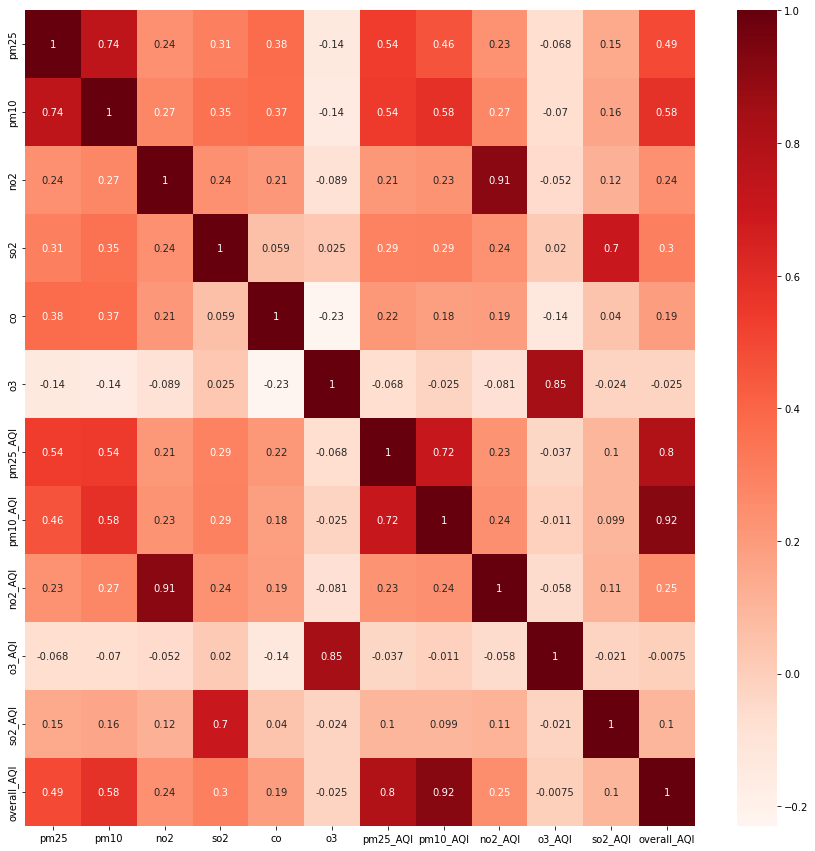

In [9]:
import seaborn as sns
plt.figure(figsize=(15,15))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('Pollutant Correlation.pdf',pad_inches = 0.1,transparent = False,facecolor ="w",edgecolor ='w',orientation ='landscape', dpi=500)
plt.show()

In [10]:
dataset = df.copy()
dataset

,pm25,pm10,no2,so2,co,o3,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI
Date,,,,,,,,,,,,
2017-10-17 10:00:00,110.750000,234.669998,82.220001,101.550003,1.06,27.120001,6.0,6.0,2.0,1.0,2.0,6.0
2017-10-17 11:00:00,165.339996,536.909973,49.090000,130.759995,0.98,87.849998,6.0,6.0,2.0,2.0,2.0,6.0
2017-10-17 12:00:00,130.910004,555.580017,43.340000,129.639999,0.53,79.690002,6.0,6.0,2.0,2.0,2.0,6.0
2017-10-17 13:00:00,126.389999,556.049988,32.970001,103.300003,0.40,78.190002,6.0,6.0,1.0,2.0,2.0,6.0
2017-10-17 14:00:00,131.899994,504.410004,42.270000,94.550003,0.17,72.720001,6.0,6.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 08:00:00,51.139999,207.800003,63.700001,11.430000,1.00,7.860000,5.0,6.0,2.0,1.0,1.0,6.0
2022-12-16 09:00:00,75.180000,241.100006,83.389999,13.300000,1.06,26.080000,1.0,6.0,2.0,1.0,1.0,6.0
2022-12-16 10:00:00,62.419998,219.899994,64.220001,14.290000,0.88,43.840000,5.0,6.0,2.0,1.0,1.0,6.0


In [11]:
from sklearn.model_selection import train_test_split

# ["pm25","pm10","no2","o3","so2","co","temp","rhum","wspd","pres","pm25_AQI","pm10_AQI","no2_AQI","o3_AQI","so2_AQI","overall_AQI", "row_index"]

features=df.values
targets=df[["pm25", "pm10", "no2", "o3", "so2"]].values

X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.1, random_state=1, shuffle=False)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)

print("features:", features.shape)
print("targets:", targets.shape)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)

print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("y_val:", y_val.shape)

features: (45267, 12)
targets: (45267, 5)
X_train: (36666, 12)
X_test: (4527, 12)
X_val: (4074, 12)
y_train: (36666, 5)
y_test: (4527, 5)
y_val: (4074, 5)


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((36666, 12), (4527, 12))

In [12]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

win_length=12
batch_size=4
num_features=features.shape[1]

train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
val_generator = TimeseriesGenerator(X_val, y_val, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

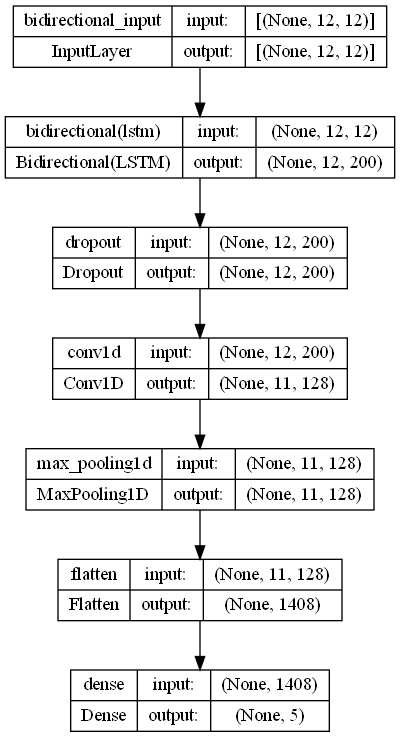

In [13]:
import tensorflow as tf
model_CNNLSTM = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), input_shape=(win_length, num_features)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha=0.7)),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(targets.shape[1])
])

model_CNNLSTM.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002),loss=tf.losses.MeanSquaredLogarithmicError())

tf.keras.utils.plot_model(model=model_CNNLSTM, show_shapes=True)

In [14]:
model_CNNLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 12, 200)          90400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 200)           0         
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           51328     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1408)              0         
                                                                 
 dense (Dense)               (None, 5)                 7

In [15]:
lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

with tf.device('/GPU:0'):
    prepared_model_CNNLSTM = model_CNNLSTM.fit(train_generator, 
                                       validation_data=val_generator,
                                       epochs=200, 
                                       shuffle=False,  
                                       callbacks=[lr_monitor, early_stopping])

Epoch 1/200
9164/9164 [==============================] - 83s 9ms/step - loss: 3.0626 - val_loss: 0.2393 - lr: 0.0020
Epoch 2/200
9164/9164 [==============================] - 76s 8ms/step - loss: 0.2663 - val_loss: 0.4777 - lr: 0.0020
Epoch 3/200
9164/9164 [==============================] - 76s 8ms/step - loss: 0.1655 - val_loss: 0.1569 - lr: 0.0020
Epoch 4/200
9164/9164 [==============================] - 75s 8ms/step - loss: 0.1573 - val_loss: 0.1685 - lr: 0.0020
Epoch 5/200
9164/9164 [==============================] - 76s 8ms/step - loss: 0.1508 - val_loss: 0.1616 - lr: 0.0020
Epoch 6/200
9164/9164 [==============================] - 76s 8ms/step - loss: 0.1461 - val_loss: 0.1601 - lr: 0.0020
Epoch 7/200
9164/9164 [==============================] - 76s 8ms/step - loss: 0.1391 - val_loss: 0.1580 - lr: 0.0010
Epoch 8/200
9164/9164 [==============================] - 76s 8ms/step - loss: 0.1363 - val_loss: 0.1558 - lr: 0.0010
Epoch 9/200
9164/9164 [==============================] - 76s 8ms

Text(0, 0.5, 'mse score')

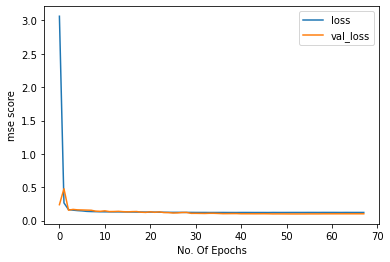

In [16]:
plt.plot(prepared_model_CNNLSTM.history["loss"],label="loss")
plt.plot(prepared_model_CNNLSTM.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")

In [17]:
# downloading csv file
cities = pd.DataFrame(prepared_model_CNNLSTM.history["loss"])
cities.to_csv('train_ownloss.csv')

In [18]:
# downloading csv file
cities = pd.DataFrame(prepared_model_CNNLSTM.history["val_loss"])
cities.to_csv('val_ownloss.csv')

In [19]:
model_CNNLSTM.evaluate(train_generator, verbose=1)
predictions=model_CNNLSTM.predict(train_generator)

pd.DataFrame(predictions)

9164/9164 [==============================] - 15s 2ms/step


,0,1,2,3,4
0,198.328690,658.141296,124.434052,8.908957,26.506907
1,247.647141,709.183350,121.826874,6.657010,84.715477
2,243.604691,690.378418,130.372574,6.349006,82.053131
3,207.168442,605.710327,108.653076,6.617111,60.006489
4,188.018997,574.870361,89.666550,7.146686,64.015678
...,...,...,...,...,...
36649,290.869965,592.992615,52.168972,3.078571,27.291439
36650,273.085449,565.929077,43.595676,2.628920,27.445850
36651,256.147583,498.561920,41.630550,2.538267,12.700922
36652,194.184525,381.614899,40.133869,2.846139,11.544357


In [20]:
# downloading csv file
cities = pd.DataFrame(predictions)
cities.to_csv('train_own.csv')

In [21]:
model_CNNLSTM.evaluate(test_generator, verbose=1)

1129/1129 [==============================] - 2s 2ms/step - loss: 0.1239


0.12393636256456375

In [22]:
predictions=model_CNNLSTM.predict(test_generator)

pd.DataFrame(predictions)

1129/1129 [==============================] - 2s 2ms/step


,0,1,2,3,4
0,121.603004,263.192017,58.096420,43.310337,14.643533
1,137.735641,310.304932,78.761269,62.474861,15.107805
2,152.490707,327.943726,80.221985,70.087418,13.552346
3,152.122833,311.734802,79.744850,77.142014,15.023936
4,140.977325,277.397217,89.526810,78.774330,13.552177
...,...,...,...,...,...
4510,64.101334,189.185394,58.098770,4.312449,12.186174
4511,58.268528,200.783310,59.881886,10.107287,13.043010
4512,74.417969,215.221802,72.099731,31.527464,13.293211
4513,59.901741,186.330658,58.727615,45.713177,13.077789


In [23]:
# downloading csv file
cities = pd.DataFrame(predictions)
cities.to_csv('test_own.csv')

In [24]:
df_pred=pd.DataFrame(X_test[:,:][win_length:])

rev_trans=scaler.inverse_transform(df_pred)

df_final=dataset[rev_trans.shape[0]*-1:]

df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions

df_final

C:\Users\91783\AppData\Local\Temp\ipykernel_6788\2253931619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
C:\Users\91783\AppData\Local\Temp\ipykernel_6788\2253931619.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[["pm25_pred", "pm10_pred", "no2_pred", "o3_pred", "so2_pred"]]=predictions
C:\Users\91783\AppData\Local\Temp\ipykernel_6788\2253931619.py:7: SettingWithCopyWarning: 
A value is trying to be set o

,pm25,pm10,no2,so2,co,o3,pm25_AQI,pm10_AQI,no2_AQI,o3_AQI,so2_AQI,overall_AQI,pm25_pred,pm10_pred,no2_pred,o3_pred,so2_pred
Date,,,,,,,,,,,,,,,,,
2022-11-06 10:00:00,160.789993,362.750000,88.879997,11.78,1.00,55.910000,6.0,6.0,2.0,2.0,1.0,6.0,121.603004,263.192017,58.096420,43.310337,14.643533
2022-11-06 11:00:00,169.429993,358.500000,94.720001,11.25,1.25,67.440002,6.0,6.0,3.0,2.0,1.0,6.0,137.735641,310.304932,78.761269,62.474861,15.107805
2022-11-06 12:00:00,181.889999,355.299988,96.300003,15.89,0.71,78.110001,6.0,6.0,3.0,2.0,1.0,6.0,152.490707,327.943726,80.221985,70.087418,13.552346
2022-11-06 13:00:00,170.690002,320.000000,112.459999,15.41,0.66,87.309998,6.0,6.0,3.0,2.0,1.0,6.0,152.122833,311.734802,79.744850,77.142014,15.023936
2022-11-06 14:00:00,147.029999,278.200012,113.879997,14.47,0.65,90.379997,6.0,6.0,3.0,2.0,1.0,6.0,140.977325,277.397217,89.526810,78.774330,13.552177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16 08:00:00,51.139999,207.800003,63.700001,11.43,1.00,7.860000,5.0,6.0,2.0,1.0,1.0,6.0,64.101334,189.185394,58.098770,4.312449,12.186174
2022-12-16 09:00:00,75.180000,241.100006,83.389999,13.30,1.06,26.080000,1.0,6.0,2.0,1.0,1.0,6.0,58.268528,200.783310,59.881886,10.107287,13.043010
2022-12-16 10:00:00,62.419998,219.899994,64.220001,14.29,0.88,43.840000,5.0,6.0,2.0,1.0,1.0,6.0,74.417969,215.221802,72.099731,31.527464,13.293211


<AxesSubplot:xlabel='Date'>

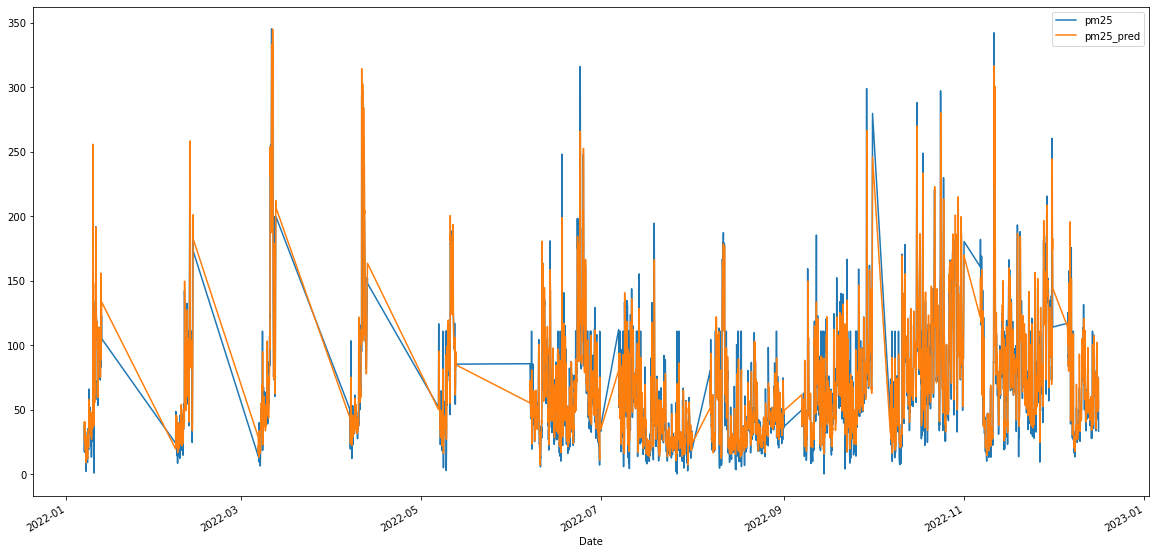

In [25]:
df_final[["pm25","pm25_pred"]].plot(figsize=(20,10))

In [26]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mslr = tf.keras.metrics.mean_squared_logarithmic_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mslr": mslr.numpy(),
           }

In [27]:
selected_features = ["pm25", "pm10", "no2", "o3", "so2"]

for feature in selected_features:
    print("-----{}-----".format(feature))
    print(evaluate_preds(y_true=df_final[feature].values,
                         y_pred=df_final["{}_pred".format(feature)].values)
         )

-----pm25-----
{'mae': 11.765652, 'mse': 333.744, 'rmse': 18.268661, 'mape': 67.133286, 'mslr': 0.11408617}
-----pm10-----
{'mae': 26.27489, 'mse': 2385.137, 'rmse': 48.837864, 'mape': 50.03926, 'mslr': 0.09890529}
-----no2-----
{'mae': 12.641437, 'mse': 508.85254, 'rmse': 22.55776, 'mape': 16.241745, 'mslr': 0.056614026}
-----o3-----
{'mae': 4.493444, 'mse': 58.801517, 'rmse': 7.668215, 'mape': 29.884047, 'mslr': 0.122540385}
-----so2-----
{'mae': 3.9361482, 'mse': 35.130238, 'rmse': 5.927077, 'mape': 80.06892, 'mslr': 0.22753595}


In [28]:
y_true=df_final['pm25'].values
y_true

array([160.79, 169.43, 181.89, ...,  62.42,  54.1 ,  33.23], dtype=float32)

In [29]:
y_pred=df_final["{}_pred".format('pm25')].values
y_pred

array([121.603004, 137.73564 , 152.4907  , ...,  74.41797 ,  59.90174 ,
        51.25726 ], dtype=float32)

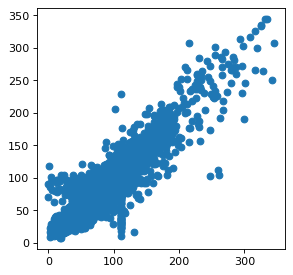

C:\Users\91783\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

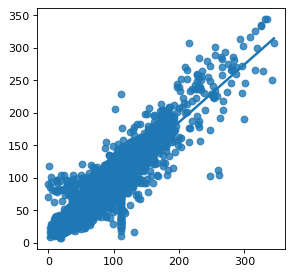

In [30]:
#for  pm2.5
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(y_true,y_pred)
plt.show()

import seaborn as sb
plt.figure(figsize=(4,4),dpi=80)
sb.regplot(y_true,y_pred,ci=None)